In [27]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

In [28]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [29]:
from iexfinance.stocks import get_historical_data
#from iexfinance.stocks import Stock
import iexfinance as iex

#DEBUG
import os

#http://finance.yahoo.com/q?s=AAPL

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [30]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE

# thought about writing an IF statement that checks for a 'pickled' filename. if it doesnt exist go through with the
# IEXF call. if it does, just read the pickled file into a DF. this can be controlled by deleting the pickled file
# instead of editing code.


#######This is how i got the data initially
#start = datetime(2018, 1, 1)
#end = datetime(2018, 12, 31)
#df = get_historical_data(list_of_tickers, start, end,output_format='pandas',close_only=True)


######## WRITE TO PICKLE
#df.to_hdf("SPYandAGG_2018Data.h5", key='df')

### READ FROM PICKLE to DF
#unpickled_DF = pd.read_hdf('SPYandAGG_2018Data.h5', 'df')
unpickled_DF = pd.read_hdf('SPYandAGG_Data.h5', 'df')


###NOTES
#df = get_historical_data("TSLA", "20190617", close_only=True)

In [31]:
unpickled_DF

SPYcloseDF = unpickled_DF['SPY']['close']
AGGcloseDF = unpickled_DF['AGG']['close']

#SPYdaily = (SPYcloseDF  - SPYcloseDF.shift(1)) / SPYcloseDF.shift(1)
#AGGdaily = (AGGcloseDF  - AGGcloseDF.shift(1)) / AGGcloseDF.shift(1)
AGGdaily = AGGcloseDF.pct_change
SPYdaily = SPYcloseDF.pct_change

SPYdaily

<bound method NDFrame.pct_change of date
2017-01-03    225.24
2017-01-04    226.58
2017-01-05    226.40
2017-01-06    227.21
2017-01-09    226.46
               ...  
2017-12-22    267.51
2017-12-26    267.19
2017-12-27    267.32
2017-12-28    267.87
2017-12-29    266.86
Name: close, Length: 251, dtype: float64>

In [32]:
unpickled_DF

SPY                                       AGG                  \
              open    high     low   close    volume    open    high     low   
date                                                                           
2017-01-03  225.04  225.83  223.88  225.24  91366522  107.73  108.22  107.73   
2017-01-04  225.62  226.75  225.61  226.58  78744433  108.16  108.21  108.03   
2017-01-05  226.27  226.58  225.48  226.40  78379012  108.37  108.68  108.22   
2017-01-06  226.53  227.75  225.90  227.21  71559922  108.43  108.50  108.26   
2017-01-09  226.91  227.07  226.42  226.46  46939676  108.54  108.54  108.43   
...            ...     ...     ...     ...       ...     ...     ...     ...   
2017-12-22  267.60  267.64  266.90  267.51  78720873  108.82  108.89  108.81   
2017-12-26  267.05  267.44  266.89  267.19  45244433  108.91  109.01  108.87   
2017-12-27  267.38  267.73  267.01  267.32  57750986  109.02  109.33  109.02   
2017-12-28  267.89  267.92  267.45  267.87  45116139  109.22  109.26  109.14   
2017-12-29  268.53  268.55  266.64  266.86  96007424  109.28  109.39  109.24   

                             
             close   volume  
date                         
2017-01-03  108.17  5079339  
2017-01-04  108.20  3297075  
2017-01-05  108.65  5165933  
2017-01-06  108.29  2910119  
2017-01-09  108.47  3030497  
...            ...      ...  
2017-12-22  108.87  3292848  
2017-12-26  108.96  1873401  
2017-12-27  109.30  2046950  
2017-12-28  109.22  2895441  
2017-12-29  109.33  2813359  

[251 rows x 10 columns]

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [33]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE

SPYcloseDF = unpickled_DF['SPY']['close']
AGGcloseDF = unpickled_DF['AGG']['close']

SPYdaily = (SPYcloseDF  - SPYcloseDF.shift(1)) / SPYcloseDF.shift(1)
AGGdaily = (AGGcloseDF  - AGGcloseDF.shift(1)) / AGGcloseDF.shift(1)

print(f"SPY Dailies:\n {SPYdaily.head()}\n")
print(f"AGG Dailies:\n {AGGdaily.head()}\n")



SPY Dailies:
 date
2017-01-03         NaN
2017-01-04    0.005949
2017-01-05   -0.000794
2017-01-06    0.003578
2017-01-09   -0.003301
Name: close, dtype: float64

AGG Dailies:
 date
2017-01-03         NaN
2017-01-04    0.000277
2017-01-05    0.004159
2017-01-06   -0.003313
2017-01-09    0.001662
Name: close, dtype: float64



In [34]:
# Calculate volatility
# YOUR CODE HERE

SPYvoli = SPYdaily.std()# * np.sqrt(252)
AGGvoli = AGGdaily.std()# * np.sqrt(252)

print(f"SPY Voli:\n {SPYvoli}\n")
print(f"AGG Voli:\n {AGGvoli}\n")

SPY Voli:
 0.0042511062695797745

AGG Voli:
 0.0018105053253493384



In [35]:
# Save the last day's closing price
LastdaySPY = SPYcloseDF[-1]
LastdayAGG = AGGcloseDF[-1]

#For clarity in monteCarlo
SPY_simPrices = [LastdaySPY]
AGG_simPrices = [LastdayAGG]


AGG_adr = AGGdaily.mean()
SPY_adr = SPYdaily.mean()

print(SPY_adr)
print(SPYdaily.std())
SPYcloseDF

0.0006874651726549415
0.0042511062695797745


date
2017-01-03    225.24
2017-01-04    226.58
2017-01-05    226.40
2017-01-06    227.21
2017-01-09    226.46
               ...  
2017-12-22    267.51
2017-12-26    267.19
2017-12-27    267.32
2017-12-28    267.87
2017-12-29    266.86
Name: close, Length: 251, dtype: float64

In [36]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

#####DEBUG TEST
#number_simulations = 10
#number_records = 252 * 30

### randos
#randomArray = np.random.random([1,3_780_000])

#myflot = randomArray[0][1]
#myflot
#type(1+np.random.normal(1,2))

SPYnumArray = (1 + np.random.normal(SPY_adr, SPYdaily.std(),3_800_000))
AGGnumArray = (1 + np.random.normal(AGG_adr, AGGdaily.std(),3_800_000))

#SPYnumArray[:100]

#(1 + np.random.normal(avg_daily_return, std_dev_daily_return)

#(np.random.normal(AGG_adr, AGGdaily.std(),300)).min()

In [37]:
#1 + np.random.normal(AGG_adr, AGGdaily.std(),100)

#SPYdaily.std()

In [38]:
# Run the Monte Carlo Simulation
randItr = 0

for x in range(number_simulations):
    
    # YOUR CODE HERE
    
    SPYsimPriceList = [LastdaySPY]
    AGGsimPriceList = [LastdayAGG]
    #print(x)
    for i in range(number_records):
        SPY_currSim = SPYsimPriceList[-1] * SPYnumArray[randItr]
        AGG_currSim = AGGsimPriceList[-1] * AGGnumArray[randItr]
        
        #Append the simulated price to the list
        SPYsimPriceList.append(SPY_currSim)
        AGGsimPriceList.append(AGG_currSim)
        randItr += 1
    ###### END INNER LOOP
    
    monte_carlo["SPY prices"] = pd.Series(SPYsimPriceList)
    monte_carlo["AGG prices"] = pd.Series(AGGsimPriceList)
    
    SimDR = monte_carlo.pct_change()

    
    weights = [0.6, 0.4]
    SimDRweighted = SimDR.dot(weights)
    portfolio_cumulative_returns[x] = (1 + SimDRweighted.fillna(0)).cumprod()
    
    
#len(SPYsimPriceList)

#SPYsimulated_df = pd.DataFrame({"Simulated SPY Prices": SPYsimPriceList})
#AGGsimulated_df = pd.DataFrame({"Simulated AGG Prices": AGGsimPriceList})



In [39]:


# Print records from the DataFrame
portfolio_cumulative_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
7556,21.165574,33.791391,28.303811,21.415522,18.137441,37.169329,22.137971,24.695024,32.965797,22.710338,...,22.312865,21.738077,38.974521,19.601115,22.423285,20.705377,20.226151,26.473605,33.056081,34.935332
7557,21.248523,33.809388,28.325674,21.495594,18.058425,37.224239,22.194327,24.691473,32.975090,22.668913,...,22.453472,21.815820,38.873398,19.584189,22.411181,20.715348,20.225646,26.465539,33.073798,35.129064
7558,21.264056,33.792539,28.343701,21.525269,17.933657,37.286582,22.140362,24.701008,32.893332,22.770774,...,22.497304,21.841003,38.868832,19.662496,22.516911,20.745884,20.245591,26.415949,33.138121,35.179422
7559,21.252639,33.726352,28.283248,21.545495,17.910381,37.417998,22.178391,24.684598,32.796631,22.813576,...,22.541636,21.892556,38.894433,19.654127,22.585583,20.804945,20.127812,26.402300,33.111861,35.184245
7560,21.251441,33.971322,28.228777,21.589709,17.926041,37.556198,22.301587,24.753922,32.911760,22.840127,...,22.512917,21.965516,39.003188,19.647795,22.574822,20.784453,20.058193,26.491634,33.042610,35.209432


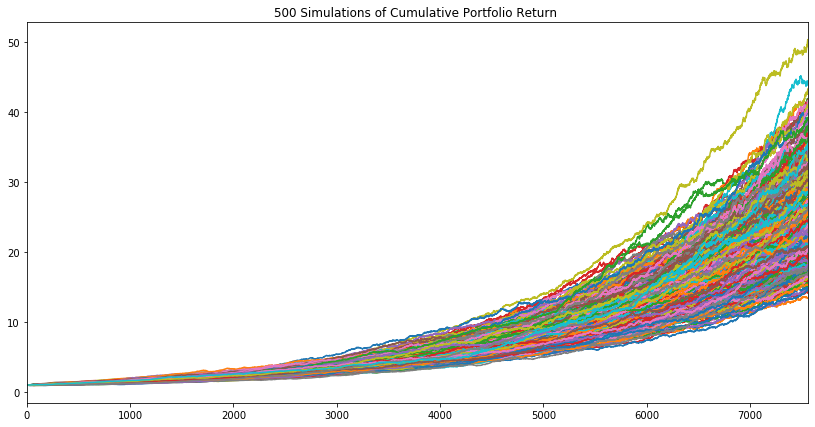

In [40]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return "
portfolio_cumulative_returns.plot(legend=None, title=plot_title,figsize=(14,7))

In [41]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
#simulated cumlative ret
thirtyYearProbability = portfolio_cumulative_returns.iloc[-1, :]
print(thirtyYearProbability)


0      21.251441
1      33.971322
2      28.228777
3      21.589709
4      17.926041
         ...    
495    20.784453
496    20.058193
497    26.491634
498    33.042610
499    35.209432
Name: 7560, Length: 500, dtype: float64


In [42]:
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002494,0.997257,0.997533,0.996020,0.997209,0.999788,1.000747,0.995447,1.001913,1.001841,...,0.998602,1.002407,0.998980,0.999578,1.001040,0.998562,0.999234,1.004962,0.998276,1.003861
2,1.002225,0.995159,0.997572,0.994255,0.996867,0.998781,1.003888,0.995284,1.008627,1.003138,...,0.994935,1.000856,0.999036,1.003292,1.004683,0.998738,1.003998,1.002938,0.998352,1.008034
3,1.005399,0.998564,0.998572,0.992820,0.996311,0.994770,1.004948,0.992902,1.011616,1.002600,...,0.997334,1.001840,1.001360,0.999760,1.002724,0.996851,1.003764,1.001847,1.000426,1.012337
4,1.008574,1.001025,1.000601,0.993704,0.999305,0.989679,0.999269,0.994687,1.009551,1.006604,...,0.996975,1.002586,1.004225,0.998904,1.002822,0.996254,1.007778,1.000251,1.000009,1.009556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.165574,33.791391,28.303811,21.415522,18.137441,37.169329,22.137971,24.695024,32.965797,22.710338,...,22.312865,21.738077,38.974521,19.601115,22.423285,20.705377,20.226151,26.473605,33.056081,34.935332
7557,21.248523,33.809388,28.325674,21.495594,18.058425,37.224239,22.194327,24.691473,32.975090,22.668913,...,22.453472,21.815820,38.873398,19.584189,22.411181,20.715348,20.225646,26.465539,33.073798,35.129064
7558,21.264056,33.792539,28.343701,21.525269,17.933657,37.286582,22.140362,24.701008,32.893332,22.770774,...,22.497304,21.841003,38.868832,19.662496,22.516911,20.745884,20.245591,26.415949,33.138121,35.179422
7559,21.252639,33.726352,28.283248,21.545495,17.910381,37.417998,22.178391,24.684598,32.796631,22.813576,...,22.541636,21.892556,38.894433,19.654127,22.585583,20.804945,20.127812,26.402300,33.111861,35.184245


In [43]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
#5040 is 252days * 20 years
twentyYearProbability = portfolio_cumulative_returns.iloc[5040,:5041]
print(f"End of 20 years:\n {twentyYearProbability}")


End of 20 years:
 0       8.697446
1       8.589038
2      10.849918
3       9.020780
4       6.497656
         ...    
495     6.997979
496     6.967046
497     8.930971
498    10.012218
499     8.842247
Name: 5040, Length: 500, dtype: float64


In [44]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

######
confidence_interval_30_90 = thirtyYearProbability.quantile(q=[0.05, 0.95])
confidence_interval_20_90 = twentyYearProbability.quantile(q=[0.05, 0.95])

print(confidence_interval_30_90)
print(confidence_interval_20_90)



0.05    17.162840
0.95    36.746862
Name: 7560, dtype: float64
0.05     6.286127
0.95    11.727582
Name: 5040, dtype: float64


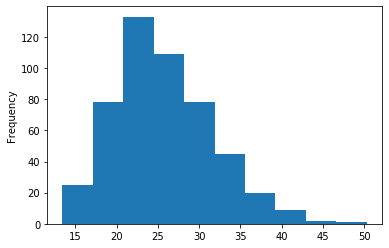

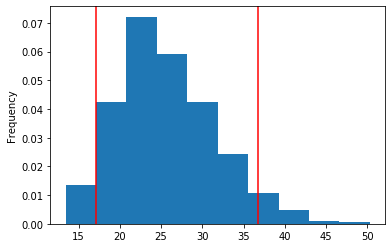

In [45]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
#### 30 year
thirtyYearProbability.plot(kind='hist')
plt.figure()
thirtyYearProbability.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval_30_90.iloc[0], color='r')
plt.axvline(confidence_interval_30_90.iloc[1], color='r')



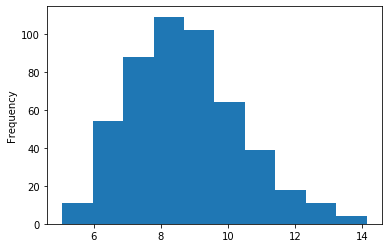

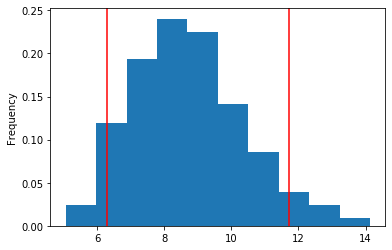

In [46]:
#### 20 year

twentyYearProbability.plot(kind='hist')
plt.figure()
twentyYearProbability.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval_20_90.iloc[0], color='r')
plt.axvline(confidence_interval_20_90.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [47]:
# YOUR CODE HERE
confidence_interval_30_90 = thirtyYearProbability.quantile(q=[0.10, 0.90])
confidence_interval_30_50 = thirtyYearProbability.quantile(q=[0.50, 0.50])
confidence_interval_30_10 = thirtyYearProbability.quantile(q=[0.90, 0.10])

print(f"90 percent: {confidence_interval_30_90}\n")
print(f"50 percent: {confidence_interval_30_50}\n")
print(f"10 percent: {confidence_interval_30_10}\n")


90 percent: 0.1    18.387231
0.9    33.636546
Name: 7560, dtype: float64

50 percent: 0.5    24.988057
0.5    24.988057
Name: 7560, dtype: float64

10 percent: 0.9    33.636546
0.1    18.387231
Name: 7560, dtype: float64



<Figure size 432x288 with 0 Axes>

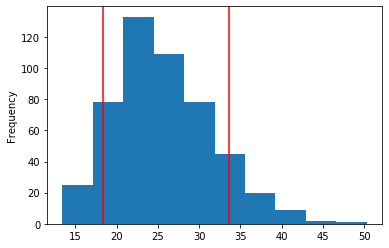

<Figure size 432x288 with 0 Axes>

In [48]:
plt.axvline(confidence_interval_30_90.iloc[0], color='r')
plt.axvline(confidence_interval_30_90.iloc[1], color='r')
thirtyYearProbability.plot(kind='hist')
plt.figure()
#thirtyYearProbability.plot(kind='hist', density=True, bins=10)





<Figure size 432x288 with 0 Axes>

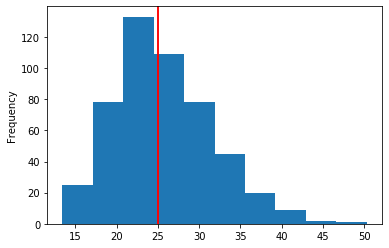

<Figure size 432x288 with 0 Axes>

In [49]:
plt.axvline(confidence_interval_30_50.iloc[0], color='r')
plt.axvline(confidence_interval_30_50.iloc[1], color='r')
thirtyYearProbability.plot(kind='hist')
plt.figure()
#thirtyYearProbability.plot(kind='hist', density=True, bins=10)


<Figure size 432x288 with 0 Axes>

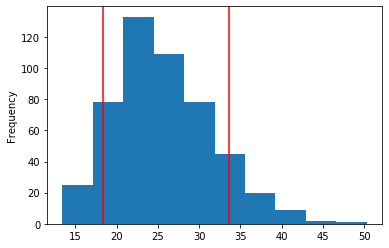

<Figure size 432x288 with 0 Axes>

In [50]:

plt.axvline(confidence_interval_30_10.iloc[0], color='r')
plt.axvline(confidence_interval_30_10.iloc[1], color='r')
thirtyYearProbability.plot(kind='hist')
plt.figure()

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [51]:
# YOUR CODE HERE


lowerBnd_90 = 20_000 + (20_000 * confidence_interval_30_90.iloc[0])
upperBnd_90 = 20_000 + (20_000 * confidence_interval_30_90.iloc[1])

lowerBnd_50 = 20_000 + (20_000 * confidence_interval_30_50.iloc[0])
upperBnd_50 = 20_000 + (20_000 * confidence_interval_30_50.iloc[1])

lowerBnd_10 = 20_000 + (20_000 * confidence_interval_30_10.iloc[0])
upperBnd_10 = 20_000 + (20_000 * confidence_interval_30_10.iloc[1])

print(f"90 + between {lowerBnd_90} and {upperBnd_90}"  )
print(f"50 + between {lowerBnd_50} and {upperBnd_50}"  )
print(f"10 + between {lowerBnd_10} and {upperBnd_10}"  )

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns


90 + between 387744.61753264087 and 692730.9129559502
50 + between 519761.1347067889 and 519761.1347067889
10 + between 692730.9129559502 and 387744.61753264087


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [52]:
# YOUR CODE HERE

plaidA = 6085
initialInvestment = 20_000

#print(f"10 + between {lowerBnd_10} and {upperBnd_10}" )
portfolio4PercentWtthdrawlLower = lowerBnd_10 * .04
portfolio4PercentWtthdrawlUpper = lowerBnd_10 * .04

withDrawalAvg = (portfolio4PercentWtthdrawlLower + portfolio4PercentWtthdrawlUpper) / 2

print(f"the Plaid withdrawl will amount to {plaidA}\n")
print(f"Based on our simulation, the 10% confidence interval shows "
      f"{round(withDrawalAvg,2)} withdrawal amount for our other portfolio\n ")



# 20,000

the Plaid withdrawl will amount to 6085

Based on our simulation, the 10% confidence interval shows 27709.24 withdrawal amount for our other portfolio
 


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [53]:
# YOUR CODE HERE
plaidA = 6085
initialInvestment2 = 20_000*1.5

lowerBnd_10 = initialInvestment2 + (initialInvestment2 * confidence_interval_30_10.iloc[0])
upperBnd_10 = initialInvestment2 + (initialInvestment2 * confidence_interval_30_10.iloc[1])
#print(f"10 + between {lowerBnd_10} and {upperBnd_10}" )
portfolio4PercentWtthdrawlLower2 = lowerBnd_10 * .04
portfolio4PercentWtthdrawlUpper2 = lowerBnd_10 * .04

withDrawalAvg2 = (portfolio4PercentWtthdrawlLower2 + portfolio4PercentWtthdrawlUpper2) / 2

print(f"the Plaid withdrawl will amount to {plaidA}\n")
print(f"After adding 10K, the 10% confidence interval shows "
      f"{round(withDrawalAvg2,2)} withdrawal amount for our other portfolio\n ")



the Plaid withdrawl will amount to 6085

After adding 10K, the 10% confidence interval shows 41563.85 withdrawal amount for our other portfolio
 


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [54]:
# YOUR CODE HERE